# 1 RAFDB—YOLO-Detection Datasets

## Convert RAFDB to YOLO format

In [4]:
import os
from PIL import Image

with open('/Users/piglet/Desktop/Project_Code/RAFDB/list_patition_label.txt', 'r') as f:
    lines = f.readlines()

image_label_dict = {}
for line in lines:
    parts = line.strip().split()
    image_name = parts[0]
    label = int(parts[1]) - 1 
    image_label_dict[image_name] = label

image_folder = '/Users/piglet/Desktop/Project_Code/RAFDB/original'  
boundingbox_folder = '/Users/piglet/Desktop/Project_Code/RAFDB/boundingbox'
output_folder = '/Users/piglet/Desktop/Project_Code/RAFDB/YOLO_OB_labels_3'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for image_name, label in image_label_dict.items():
    image_path = os.path.join(image_folder, image_name)
    boundingbox_file = os.path.join(boundingbox_folder, image_name.replace('.jpg', '_boundingbox.txt'))
    
    if os.path.exists(image_path) and os.path.exists(boundingbox_file):
        with Image.open(image_path) as img:
            image_width, image_height = img.size
        with open(boundingbox_file, 'r') as f:
            bbox = f.readline().strip().split()
            x_min, y_min, x_max, y_max = map(float, bbox)
            cx = (x_min + x_max) / 2.0
            cy = (y_min + y_max) / 2.0
            w = x_max - x_min
            h = y_max - y_min
            cx /= image_width
            cy /= image_height
            w /= image_width
            h /= image_height
            yolo_label = f"{label} {cx:.8f} {cy:.8f} {w:.8f} {h:.8f}\n"
            output_file = os.path.join(output_folder, image_name.replace('.jpg', '.txt'))
            with open(output_file, 'w') as out_f: 
                out_f.write(yolo_label)
    
        print(f"Processed {image_name}: {yolo_label.strip()}")
    else:
        print(f"File not found: {image_path} or {boundingbox_file}")

print("YOLO format label files have been generated.")


Processed train_00001.jpg: 4 0.50967212 0.35283839 0.39476004 0.31825755
Processed train_00002.jpg: 4 0.48407479 0.31667608 0.37072011 0.37365091
Processed train_00003.jpg: 3 0.49193239 0.33522124 0.29293036 0.29046382
Processed train_00004.jpg: 3 0.52885633 0.32415328 0.37864627 0.33546084
Processed train_00005.jpg: 4 0.47153577 0.34119668 0.35205993 0.28995918
Processed train_00006.jpg: 0 0.49449890 0.34907717 0.31331440 0.25503200
Processed train_00007.jpg: 4 0.48830009 0.32496847 0.36053811 0.30721530
Processed train_00008.jpg: 3 0.49756311 0.33401235 0.36383371 0.30745126
Processed train_00009.jpg: 3 0.48590597 0.32545138 0.34212911 0.29627533
Processed train_00010.jpg: 0 0.48355699 0.32273348 0.32098901 0.28282347
Processed train_00011.jpg: 3 0.49257498 0.33202769 0.31978658 0.27490883
Processed train_00012.jpg: 0 0.53108954 0.33576744 0.36052449 0.33682759
Processed train_00013.jpg: 0 0.50663058 0.36608941 0.35819494 0.34442818
Processed train_00014.jpg: 3 0.53221107 0.33853079 

### Test that the labels are correct

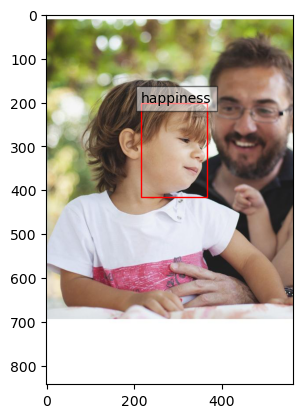

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
# classes names
classes = ['surprise', 'fear', 'disgust', 'happiness', 'sadness', 'anger', 'neutral']

image_path = r'/Users/piglet/Desktop/Project_Code/RAFDB/original/test_0003.jpg'
img = Image.open(image_path)

label_path = r'/Users/piglet/Desktop/Project_Code/RAFDB/YOLO_OB_labels_3/test_0003.txt'
with open(label_path, 'r') as f:
    labels = f.readlines()
fig, ax = plt.subplots(1)
ax.imshow(img)
width, height = img.size

for label in labels:
    parts = label.strip().split()
    class_id = int(parts[0])
    x_center = float(parts[1]) * width
    y_center = float(parts[2]) * height
    bbox_width = float(parts[3]) * width
    bbox_height = float(parts[4]) * height
    xmin = x_center - bbox_width / 2
    ymin = y_center - bbox_height / 2 
    rect = patches.Rectangle((xmin, ymin), bbox_width, bbox_height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(xmin, ymin, classes[class_id], bbox=dict(facecolor='white', alpha=0.5))

plt.show()


### After manually filtering out photos with multiple emojis in a single photo, use code block 1 below to remove the tags for those photos with multiple emojis from the yolo tags folder of all the photos. 






In [7]:
# Code block 1
import os
import shutil

folder_A = '/Users/piglet/Desktop/workspace/more_targets_image_folder'  
folder_B = '/Users/piglet/Desktop/workspace/RAFDB_all_labels'  
folder_C = '/Users/piglet/Desktop/workspace/generated_labels'  

os.makedirs(folder_C, exist_ok=True)
photos = [os.path.splitext(photo)[0] for photo in os.listdir(folder_A) if photo.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

for txt_file in os.listdir(folder_B):
    if txt_file.endswith('.txt'):
        file_name = os.path.splitext(txt_file)[0]
        if file_name in photos:
            src_path = os.path.join(folder_B, txt_file)
            dest_path = os.path.join(folder_C, txt_file)
            shutil.move(src_path, dest_path)
            print(f"Moved: {txt_file}")

print("Operation completed.")


Moved: train_02323.txt
Moved: test_0291.txt
Moved: train_09510.txt
Moved: train_07529.txt
Moved: test_1825.txt
Moved: train_07267.txt
Moved: train_00508.txt
Moved: train_01616.txt
Moved: train_03767.txt
Moved: train_02479.txt
Moved: train_05316.txt
Moved: train_09538.txt
Moved: train_08140.txt
Moved: train_06186.txt
Moved: test_0534.txt
Moved: test_0520.txt
Moved: train_03954.txt
Moved: train_01825.txt
Moved: test_0246.txt
Moved: train_10900.txt
Moved: test_1170.txt
Moved: test_0508.txt
Moved: train_05128.txt
Moved: train_03559.txt
Moved: train_02135.txt
Moved: train_11149.txt
Moved: train_08342.txt
Moved: test_0905.txt
Moved: test_1428.txt
Moved: train_00093.txt
Moved: train_04593.txt
Moved: train_05699.txt
Moved: train_11834.txt
Moved: train_06390.txt
Moved: test_2135.txt
Moved: train_02848.txt
Moved: train_00911.txt
Moved: test_0078.txt
Moved: train_02874.txt
Moved: test_2109.txt
Moved: test_2096.txt
Moved: test_0859.txt
Moved: train_02055.txt
Moved: train_06233.txt
Moved: train_044

### Then use code block 2 to combine these photos with their tags so that we can tag them accordingly on the make sense website. 

In [18]:
# Code  block 2

import os
import cv2

folder_A = '/Users/piglet/Desktop/workspace/more_targets_image_folder'  
folder_B = '/Users/piglet/Desktop/workspace/generated_labels'  
folder_D = '/Users/piglet/Desktop/workspace/composite_picture'  

classes = ['surprise', 'fear', 'disgust', 'happiness', 'sadness', 'anger', 'neutral']

os.makedirs(folder_D, exist_ok=True)
photos = [photo for photo in os.listdir(folder_A) if photo.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

for photo in photos:
    photo_name, ext = os.path.splitext(photo)
    photo_path = os.path.join(folder_A, photo)
    label_path = os.path.join(folder_B, photo_name + '.txt')

    if os.path.exists(label_path):
        img = cv2.imread(photo_path)
        if img is None:
            print(f"Failed to load image: {photo_path}")
            continue
        height, width, _ = img.shape
        with open(label_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                class_id, x_center, y_center, w, h = map(float, line.strip().split())
                class_id = int(class_id)  
                class_name = classes[class_id]  

                x_center *= width
                y_center *= height
                w *= width
                h *= height
                x1 = int(x_center - w / 2)
                y1 = int(y_center - h / 2)
                x2 = int(x_center + w / 2)
                y2 = int(y_center + h / 2)

                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(img, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        output_path = os.path.join(folder_D, photo)
        cv2.imwrite(output_path, img)
        print(f"Processed and saved: {photo}")

print("Operation completed.")


Processed and saved: test_0813.jpg
Processed and saved: train_03467.jpg
Processed and saved: train_11077.jpg
Processed and saved: train_07173.jpg
Processed and saved: train_08268.jpg
Processed and saved: test_0191.jpg
Processed and saved: train_06537.jpg
Processed and saved: train_04320.jpg
Processed and saved: train_06251.jpg
Processed and saved: test_2779.jpg
Processed and saved: test_0608.jpg
Processed and saved: train_02976.jpg
Processed and saved: test_1502.jpg
Processed and saved: train_09348.jpg
Processed and saved: train_02209.jpg
Processed and saved: train_05566.jpg
Processed and saved: train_01700.jpg
Processed and saved: train_00350.jpg
Processed and saved: train_02547.jpg
Processed and saved: train_04650.jpg
Processed and saved: train_03895.jpg
Processed and saved: test_1072.jpg
Processed and saved: train_03842.jpg
Processed and saved: train_02584.jpg
Processed and saved: test_0436.jpg
Processed and saved: train_00393.jpg
Processed and saved: train_06084.jpg
Processed and s

### The images in the folder are like below:

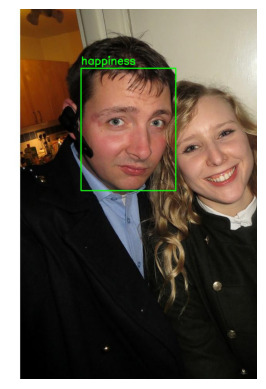

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/Users/piglet/Desktop/Project_Code/RAFDB/workspace/composite_picture/test_0110.jpg'  

plt.imshow(image)
plt.axis('off')  
plt.show()


### In this step, the photo folder just generated with multiple targets is imported into the Make Sense website for manual tagging. Then take the label file output by Make Sense and copy it back to the RAF-DB label folder. Copy the photos from the photos with multi-targets folder back to the RAF-DB photos folder.


### Make Sense Website：https://www.makesense.ai/

### Use code block 3 to Check that the label files and the photo files are not one-to-one correspondence

In [3]:
# Code block 3
import os

image_directory = '/Users/piglet/Desktop/Project_Code/RAFDB/workspace/RAFDB-detection(images+labels)/original'
text_directory = '/Users/piglet/Desktop/Project_Code/RAFDB/workspace/RAFDB-detection(images+labels)/RAFDB_all_labels'

def get_filenames_without_extension(directory, extensions):
    return set(os.path.splitext(f)[0] for f in os.listdir(directory) if f.endswith(extensions))

def find_mismatched_files(image_dir, text_dir):
    image_files = get_filenames_without_extension(image_dir, ('.jpg', '.jpeg', '.png'))
    text_files = get_filenames_without_extension(text_dir, '.txt')
    images_without_texts = image_files - text_files
    texts_without_images = text_files - image_files
    return images_without_texts, texts_without_images

images_without_texts, texts_without_images = find_mismatched_files(image_directory, text_directory)

if not images_without_texts and not texts_without_images:
    print("All images and txt files correspond to each other.")
else:
    if images_without_texts:
        print("Images without labels:")
        for image in images_without_texts:
            print(image)

    if texts_without_images:
        print("\nLabels without Images")
        for text in texts_without_images:
            print(text)


All images and txt files correspond to each other.


### Now we've got the RAF-DB dataset folder with the YOLO labels.

### Divide the RAFDB-YOLO-Detection dataset according to 7:2:1

In [3]:
import os
import shutil
import random

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def move_files(file_list, src_img_dir, src_lbl_dir, dst_img_dir, dst_lbl_dir):
    for file in file_list:
        img_path = os.path.join(src_img_dir, file)
        lbl_path = os.path.join(src_lbl_dir, file.replace('.jpg', '.txt').replace('.png', '.txt'))

        if os.path.exists(img_path) and os.path.exists(lbl_path):
            shutil.move(img_path, dst_img_dir)
            shutil.move(lbl_path, dst_lbl_dir)

def split_dataset(img_dir, lbl_dir, train_ratio=0.7, valid_ratio=0.2, test_ratio=0.1):
    images = [f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png'))]
    random.shuffle(images)

    total_count = len(images)
    train_count = int(total_count * train_ratio)
    valid_count = int(total_count * valid_ratio)

    train_files = images[:train_count]
    valid_files = images[train_count:train_count + valid_count]
    test_files = images[train_count + valid_count:]

    return train_files, valid_files, test_files

def main():
    img_dir = '/Users/piglet/Desktop/workspace/RAFDB(images+labels)/original'
    lbl_dir = '/Users/piglet/Desktop/workspace/RAFDB(images+labels)/RAFDB_all_labels'

    train_img_dir = '/Users/piglet/Desktop/workspace/RAFDB_YOLO(detection)/train/images'
    train_lbl_dir = '/Users/piglet/Desktop/workspace/RAFDB_YOLO(detection)/train/labels'
    valid_img_dir = '/Users/piglet/Desktop/workspace/RAFDB_YOLO(detection)/valid/images'
    valid_lbl_dir = '/Users/piglet/Desktop/workspace/RAFDB_YOLO(detection)/valid/labels'
    test_img_dir = '/Users/piglet/Desktop/workspace/RAFDB_YOLO(detection)/test/images'
    test_lbl_dir = '/Users/piglet/Desktop/workspace/RAFDB_YOLO(detection)/test/labels'

    create_dir(train_img_dir)
    create_dir(train_lbl_dir)
    create_dir(valid_img_dir)
    create_dir(valid_lbl_dir)
    create_dir(test_img_dir)
    create_dir(test_lbl_dir)
    train_files, valid_files, test_files = split_dataset(img_dir, lbl_dir)

    move_files(train_files, img_dir, lbl_dir, train_img_dir, train_lbl_dir)
    move_files(valid_files, img_dir, lbl_dir, valid_img_dir, valid_lbl_dir)
    move_files(test_files, img_dir, lbl_dir, test_img_dir, test_lbl_dir)

    print("The dataset spliting is complete!")

if __name__ == '__main__':
    main()


The dataset spliting is complete!


### Display datasets information

In [19]:
import os
import matplotlib.pyplot as plt

def analyze_yolo_dataset_total(dataset_path, dataset_name):
    emotions = ['surprise', 'fear', 'disgust', 'happiness', 'sadness', 'anger', 'neutral']
    emotion_counts = {emotion: 0 for emotion in emotions}
    txt_file_count = 0

    for root, _, files in os.walk(dataset_path):
        for file_name in files:
            if file_name.endswith('.txt'):
                txt_file_count += 1  
                txt_file_path = os.path.join(root, file_name)
                
                try:
                    with open(txt_file_path, 'r') as file:
                        lines = file.readlines()
                        for line in lines:
                            emotion_id = int(line.split()[0])
                            emotion = emotions[emotion_id]
                            emotion_counts[emotion] += 1
                except Exception as e:
                    print(f"Error reading file {file_name}: {e}")
                    continue
    for emotion, count in emotion_counts.items():
        print(f'{emotion}: {count} instances')

    print(f'Total number of txt files read: {txt_file_count}')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    wedges, texts, autotexts = ax1.pie(emotion_counts.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', startangle=140)
    ax1.set_title(f'Distribution of Emotions in {dataset_name}', fontweight='bold', fontsize=14)
    ax1.axis('equal') 

    for text in texts + autotexts:
        text.set_fontsize(17)
        text.set_fontweight('bold')

    bars = ax2.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
    ax2.set_xlabel('Emotions', fontweight='bold', fontsize=17)
    ax2.set_ylabel('Number of Instances', fontweight='bold', fontsize=17)
    ax2.set_title(f'Number of Instances for Each Emotion in {dataset_name}', fontweight='bold', fontsize=14)

    for bar in bars:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontweight='bold', fontsize=17)

    ax2.tick_params(axis='x', labelsize=14)
    ax2.tick_params(axis='y', labelsize=14)

    plt.show()


surprise: 1780 instances
fear: 452 instances
disgust: 1008 instances
happiness: 7325 instances
sadness: 2584 instances
anger: 937 instances
neutral: 3625 instances
Total number of txt files read: 15339


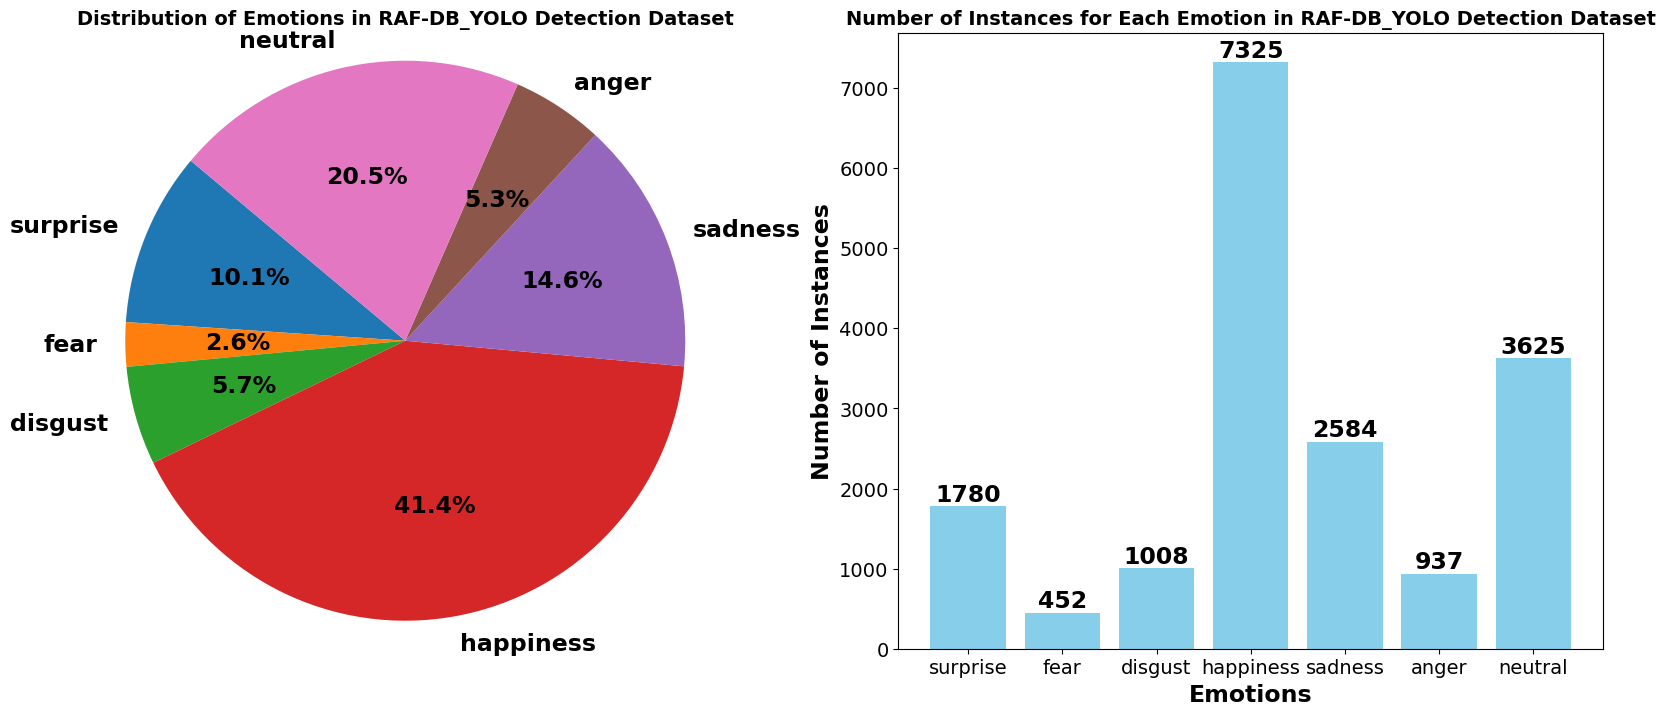

In [40]:
dataset_path = '/Users/piglet/Desktop/Project_Code/RAFDB/workspace/RAFDB_YOLO-detection'
dataset_name = 'RAF-DB_YOLO Detection Dataset'
analyze_yolo_dataset_total(dataset_path, dataset_name)

           surprise  fear  disgust  happiness  sadness  anger  neutral  Total
Train set      1233   319      714       5135     1806    677     2540  12424
Valid set       356    79      207       1465      522    175      731   3535
Test set        191    54       87        725      256     85      354   1752


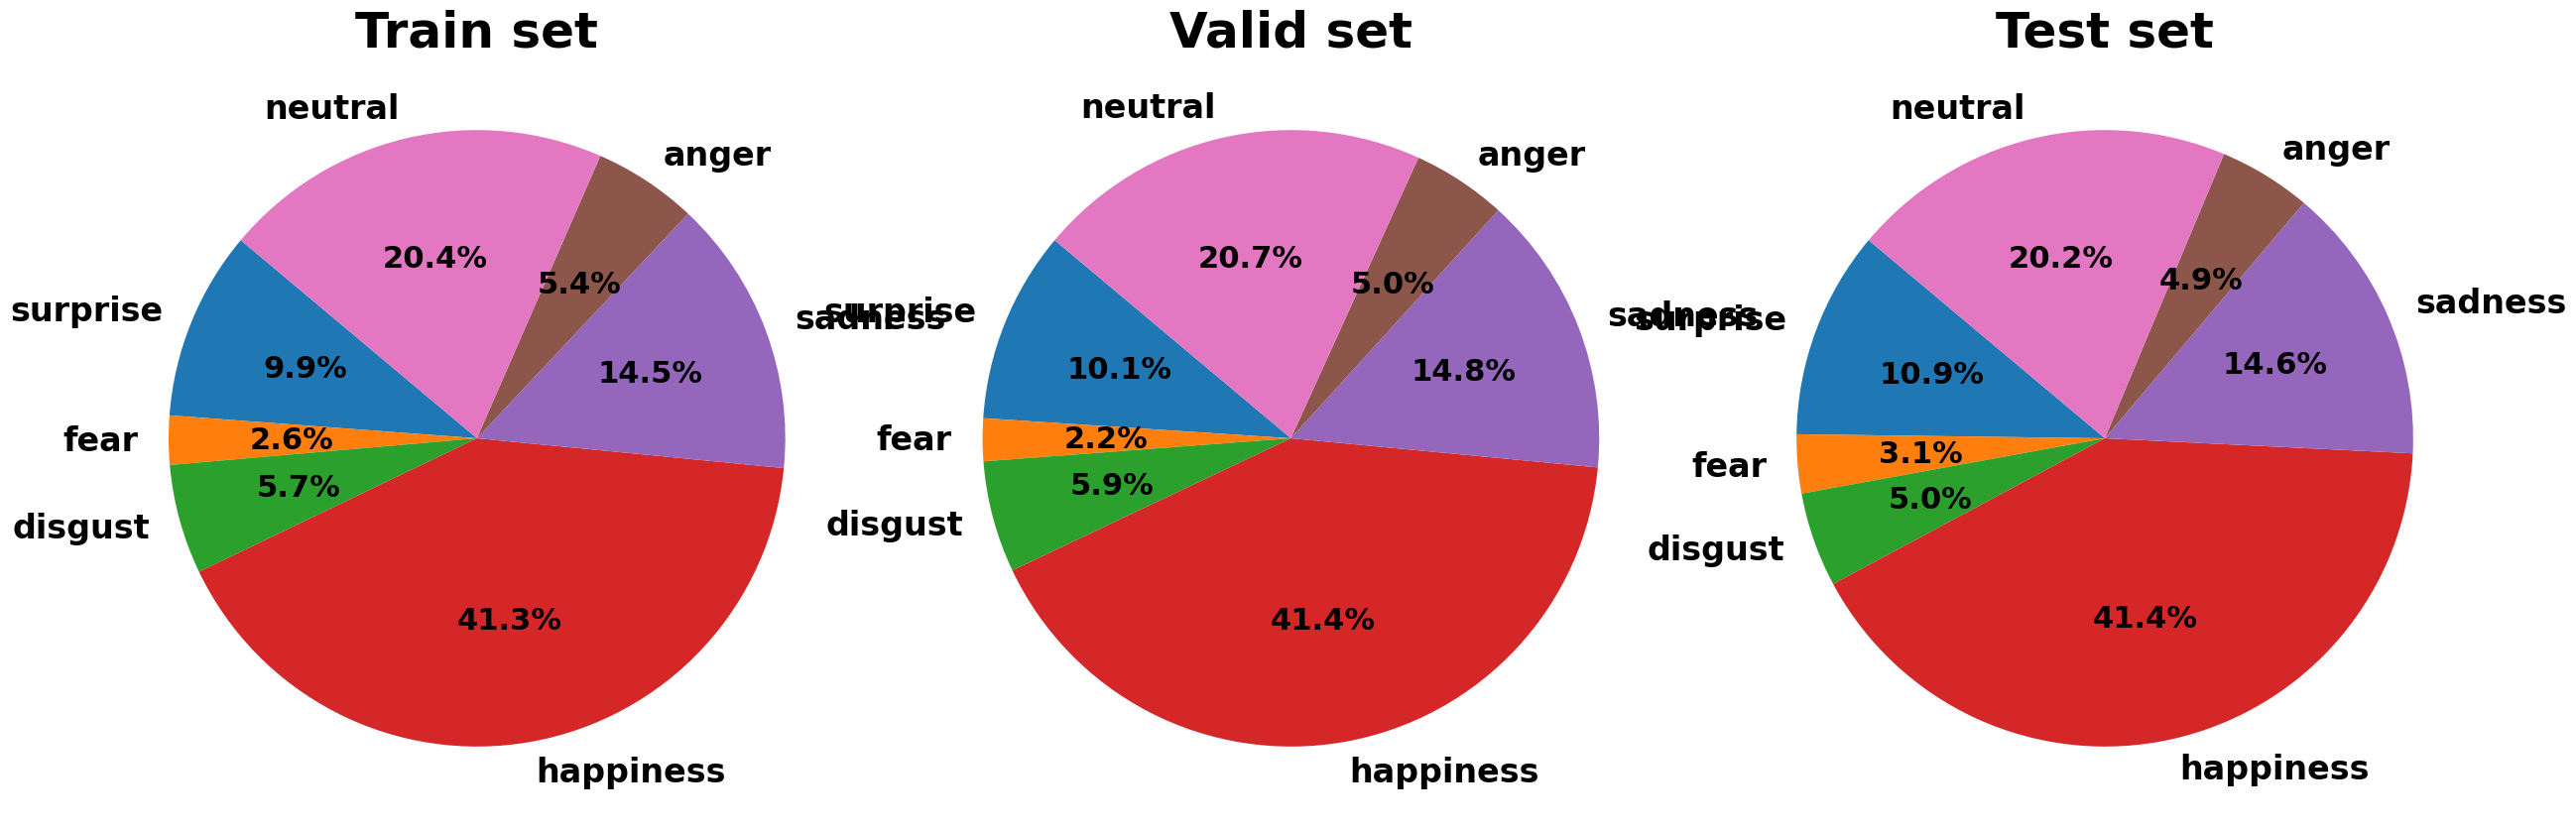

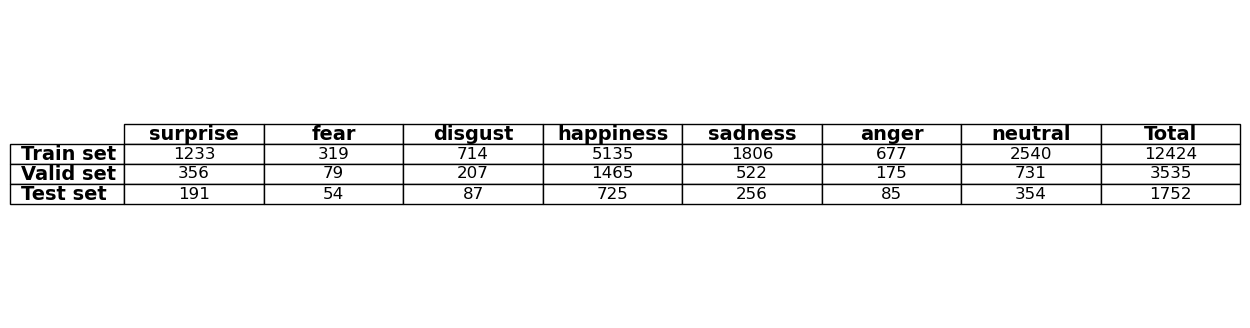

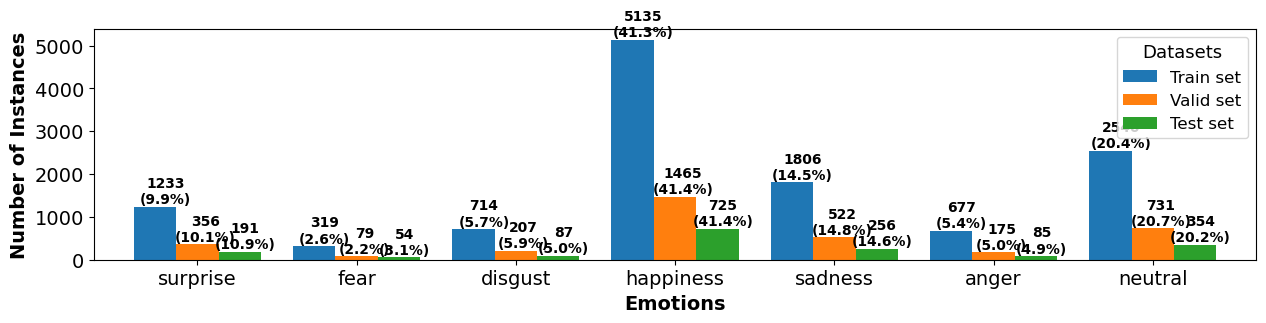

In [4]:
import os
import matplotlib.pyplot as plt
import pandas as pd

def analyze_yolo_dataset_multiple(paths, dataset_names):
    emotions = ['surprise', 'fear', 'disgust', 'happiness', 'sadness', 'anger', 'neutral']

    def get_emotion_counts(dataset_path):
        emotion_counts = {emotion: 0 for emotion in emotions}
        txt_file_count = 0

        for root, _, files in os.walk(dataset_path):
            for file_name in files:
                if file_name.endswith('.txt'):
                    txt_file_count += 1
                    txt_file_path = os.path.join(root, file_name)

                    try:
                        with open(txt_file_path, 'r') as file:
                            lines = file.readlines()

                            for line in lines:
                                emotion_id = int(line.split()[0])
                                emotion = emotions[emotion_id]
                                emotion_counts[emotion] += 1
                    except Exception as e:
                        print(f"Error reading file {file_name}: {e}")
                        continue

        return emotion_counts, txt_file_count

    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    emotion_data = []

    for i, (dataset_path, dataset_name) in enumerate(zip(paths, dataset_names)):
        emotion_counts, txt_file_count = get_emotion_counts(dataset_path)

        emotion_data.append(emotion_counts)

        # pie chart
        wedges, texts, autotexts = axes[i].pie(emotion_counts.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', startangle=140)
        axes[i].set_title(f'{dataset_name}', fontweight='bold', fontsize=36)
        axes[i].axis('equal')  

        for text in texts + autotexts:
            text.set_fontsize(24)
            text.set_fontweight('bold')
        for autotext in autotexts:
            autotext.set_fontsize(22)
            autotext.set_fontweight('bold')

    emotion_df = pd.DataFrame(emotion_data, index=dataset_names)
    emotion_df['Total'] = emotion_df.sum(axis=1)
    print(emotion_df)

    # table
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.axis('off')
    tbl = ax.table(cellText=emotion_df.values, colLabels=emotion_df.columns, rowLabels=emotion_df.index, loc='center', cellLoc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(12)
    tbl.scale(1.2, 1.2)

    for key, cell in tbl.get_celld().items():
        if key[0] == 0 or key[1] == -1:
            cell.set_text_props(fontweight='bold', fontsize=14)

    plt.show()

    # bar chart
    emotion_df = emotion_df.drop(columns=['Total'])  

    ax = emotion_df.T.plot(kind='bar', figsize=(15, 3), width=0.8)

    plt.xlabel('Emotions', fontweight='bold', fontsize=14)
    plt.ylabel('Number of Instances', fontweight='bold', fontsize=14)
    plt.xticks(rotation=0, fontsize=14) 
    plt.yticks(fontsize=14)
    plt.legend(title='Datasets', title_fontsize='13', fontsize='12')

    for idx, emotion in enumerate(emotion_df.columns):
        for i, dataset_name in enumerate(dataset_names):
            value = emotion_df.loc[dataset_name, emotion]
            total = emotion_df.loc[dataset_name].sum()
            percentage = (value / total) * 100
            ax.text(idx + (i * 0.25) - 0.2, value + 5, f'{value}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.show()

paths = [
    '/Users/piglet/Desktop/Project_Code/RAFDB/workspace/RAFDB_YOLO-detection/train/labels',
    '/Users/piglet/Desktop/Project_Code/RAFDB/workspace/RAFDB_YOLO-detection/valid/labels',
    '/Users/piglet/Desktop/Project_Code/RAFDB/workspace/RAFDB_YOLO-detection/test/labels'
]
dataset_names = ['Train set', 'Valid set', 'Test set']
analyze_yolo_dataset_multiple(paths, dataset_names)


### View the original RAFDB data ratios (before Make Sense labelling)

surprise: 1619 instances
fear: 355 instances
disgust: 877 instances
happiness: 5957 instances
sadness: 2460 instances
anger: 867 instances
neutral: 3204 instances
Total number of txt files read: 15339


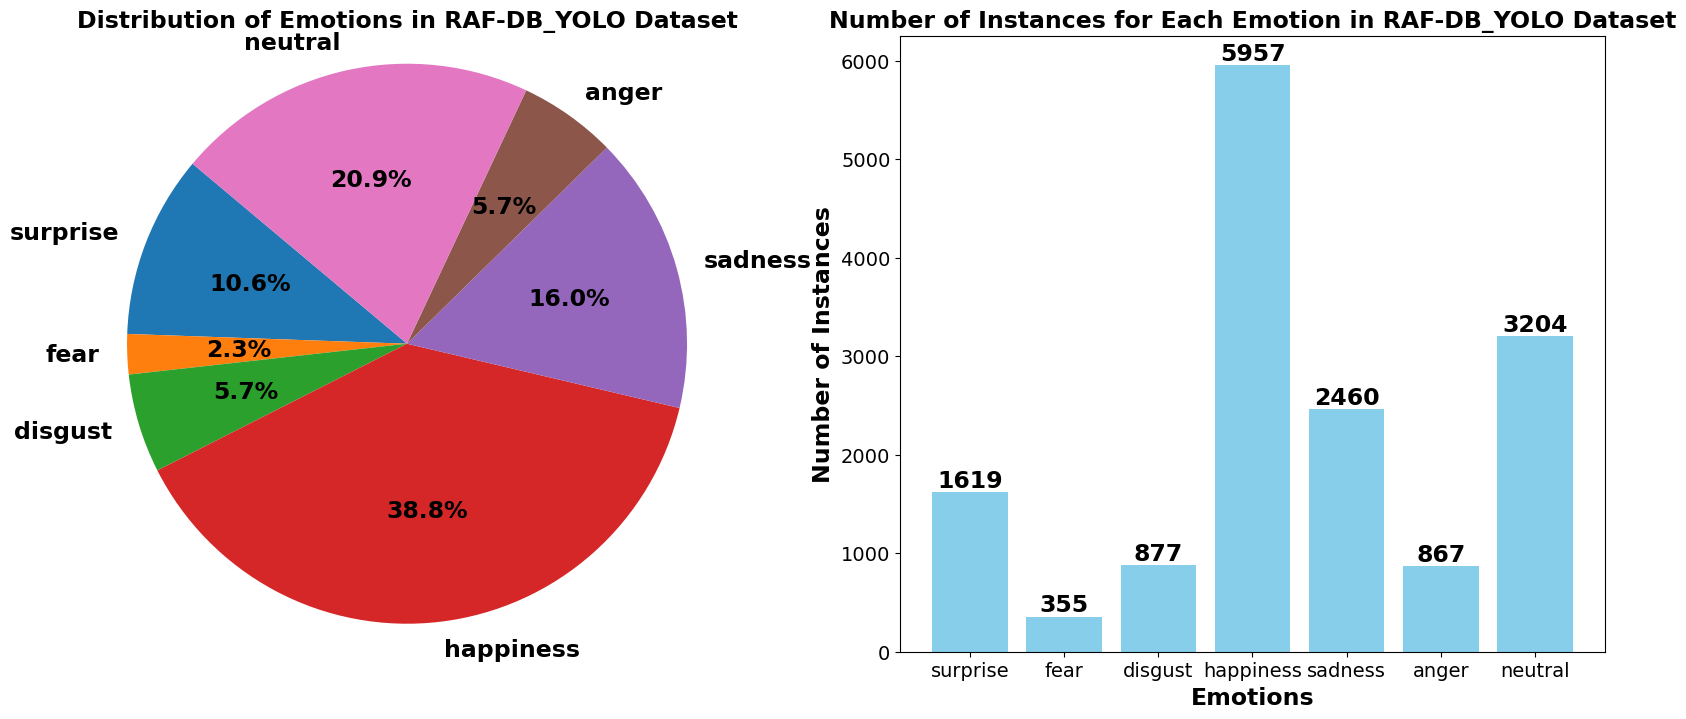

In [25]:
dataset_path = '/Users/piglet/Desktop/Project_Code/RAFDB/YOLO_OB_Labels'
dataset_name = 'RAF-DB_YOLO Dataset'
analyze_yolo_dataset_total(dataset_path, dataset_name)

### Output checking

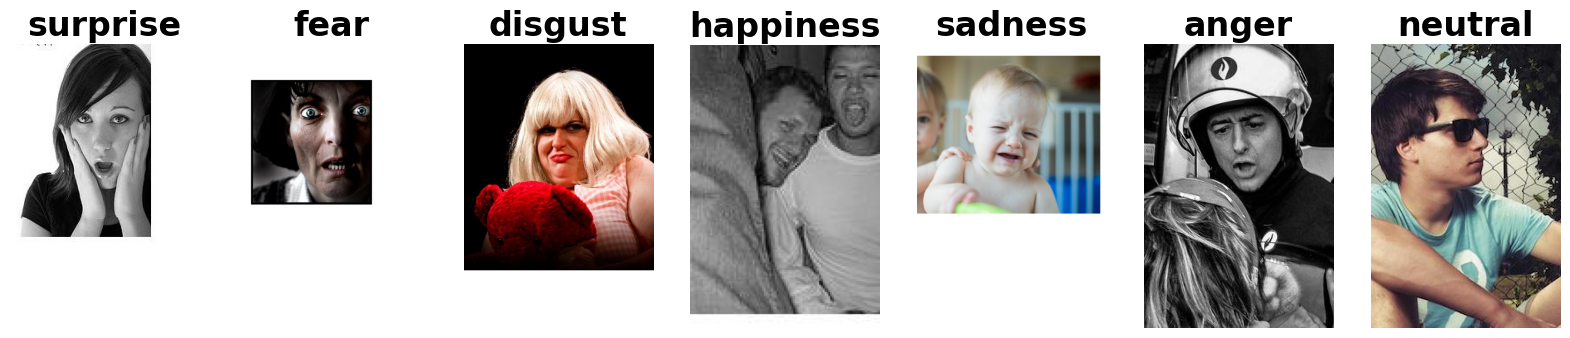

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = '/Users/piglet/Desktop/Project_Code/RAFDB/workspace/RAFDB_YOLO-detection/train'
images_path = os.path.join(dataset_path, 'images')  
labels_path = os.path.join(dataset_path, 'labels')  

emotions = ['surprise', 'fear', 'disgust', 'happiness', 'sadness', 'anger', 'neutral']

emotion_to_index = {emotion: i for i, emotion in enumerate(emotions)}

found_images = {emotion: None for emotion in emotions}

for label_file in os.listdir(labels_path):
    if label_file.endswith('.txt'):
        with open(os.path.join(labels_path, label_file), 'r') as file:
            lines = file.readlines()
            for line in lines:
                parts = line.strip().split()
                category_index = int(parts[0])
                for emotion, index in emotion_to_index.items():
                    if category_index == index and found_images[emotion] is None:
                        image_file = label_file.replace('.txt', '.jpg')
                        image_file_with_path = os.path.join(images_path, image_file)
                        if os.path.exists(image_file_with_path):
                            found_images[emotion] = image_file_with_path
                            break
            if all(found_images.values()):
                break
fig = plt.figure(figsize=(20, 10))
for i, (emotion, img_path) in enumerate(found_images.items()):
    if img_path is not None:
        img = Image.open(img_path)
        ax = fig.add_subplot(1, len(emotions), i + 1)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(emotion, fontsize=24, fontweight='bold')  

plt.show()
